# Prelim Exam
#### Submitted by: Franch Lee D. Bataan

In [1]:
#Importing Libraries needed 
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib 
import matplotlib.pyplot as plt

In [2]:
#Importing the dataset to the Jupyter Notebook
data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')
Output=pd.read_csv('Output.csv')

In [3]:
#Displaying the dataset the will be use in training
print(data_train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [4]:
#Checking blank values on columns of the dataset
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#Checking blank values along with the Data Type of the labels
print(data_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


<AxesSubplot:xlabel='Sex', ylabel='count'>

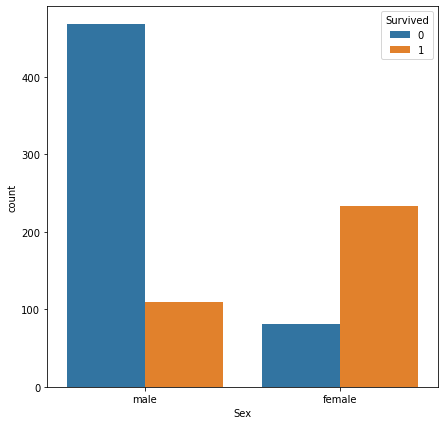

In [6]:
#For visualization of data between gender survivor
plt.figure(figsize=(7,7))
sns.countplot(data=data_train, x='Sex', hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

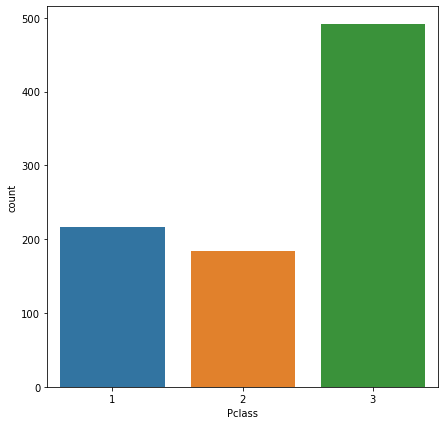

In [7]:
#To show the countplot of the Pclass (Ticket class)
plt.figure(figsize=(7,7))
sns.countplot(data=data_train, x='Pclass')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

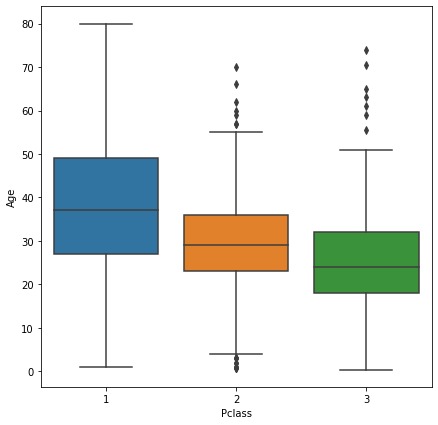

In [8]:
plt.figure(figsize=(7,7))
sns.boxplot(data=data_train, x='Pclass', y='Age')

In [9]:
#Replacing missing values in Age by median from boxplot
def fit(cols):
    Pclass = cols[1]
    Age = cols[0]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 22
    else:
        return Age

In [10]:
dataset=[data_train, data_test]
for data in dataset:
    data['Age']=data[['Age','Pclass']].apply(fit, axis=1)

In [11]:
#Replacing missing values in the Embarked column by letter Z
data_train.Embarked.fillna("Z", inplace=True)

In [12]:
#Displaying the elements in the column sex
data_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [13]:
#Displaying the elements in the column Embarked
data_train['Embarked'].unique()

array(['S', 'C', 'Q', 'Z'], dtype=object)

In [14]:
#Displaying the elements in the column Cabin
data_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [15]:
import re
New_Cabin = {"A":1, "B":2, "C":3, "D":4, "E":5, "F":6, "G":7, "Z":8}
dataset = [data_train, data_test]

for data in dataset:
    data['Cabin']= data['Cabin'].fillna("Z")
    data['New_Cabin']= data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    data['New_Cabin']= data['New_Cabin'].map(New_Cabin)
    data['New_Cabin']= data['New_Cabin'].fillna(0)

In [16]:
#displaying the colums and rows in the dataset with values
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Z,S,8.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Z,S,8.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Z,S,8.0


In [17]:
#Parch is the number of parents / children aboard the Titanic
#SibSp is the number of siblings / spouses aboard the Titanic
dataset=[data_train, data_test]
for data in dataset:
    data['Family'] = data['Parch'] + data['SibSp'] 
    data.loc[data['Family'] ==0,'Individual'] =1
    data.loc[data['Family'] > 0,'Individual'] =0

In [18]:
Sex = {'male': 1,'female': 0}
Embarked = {'C':0,'Q':1,'S':3,'Z':4}

In [19]:
dataset=[data_train, data_test]
for data in dataset:
    data['Sex'].replace(Sex, inplace=True)
    data['Embarked'].replace(Embarked, inplace=True)
    data_test.Fare.fillna(0, inplace=True)

In [20]:
data_train=data_train.dropna(subset=['Embarked'])

In [21]:
#converting str and float data type into int64
dataset=[data_train, data_test]
for data in dataset:
    data['Age'] = data['Age'].apply(np.int64)
    data['Fare'] = data['Fare'].apply(np.int64)
    data['Embarked'] = data['Embarked'].apply(np.int64)
    data['New_Cabin'] = data['New_Cabin'].apply(np.int64)
    data['Individual'] = data['Individual'].apply(np.int64)

In [22]:
#Dropping columns that will nt be use
data_train=data_train.drop(columns=["PassengerId","Name","Cabin","Ticket"],axis=1)

In [23]:
data_test['Sex'].replace(Sex, inplace=True)
data_test['Embarked'].replace(Embarked, inplace=True)

In [24]:
#Rechecking if the dataframe has missing values and updated for data_train
print(data_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Survived    891 non-null    int64
 1   Pclass      891 non-null    int64
 2   Sex         891 non-null    int64
 3   Age         891 non-null    int64
 4   SibSp       891 non-null    int64
 5   Parch       891 non-null    int64
 6   Fare        891 non-null    int64
 7   Embarked    891 non-null    int64
 8   New_Cabin   891 non-null    int64
 9   Family      891 non-null    int64
 10  Individual  891 non-null    int64
dtypes: int64(11)
memory usage: 76.7 KB
None


In [25]:
#Rechecking if the dataframe has missing values and updated for data_test
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Name         418 non-null    object
 3   Sex          418 non-null    int64 
 4   Age          418 non-null    int64 
 5   SibSp        418 non-null    int64 
 6   Parch        418 non-null    int64 
 7   Ticket       418 non-null    object
 8   Fare         418 non-null    int64 
 9   Cabin        418 non-null    object
 10  Embarked     418 non-null    int64 
 11  New_Cabin    418 non-null    int64 
 12  Family       418 non-null    int64 
 13  Individual   418 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 45.8+ KB
None


In [26]:
data_test=data_test.drop(columns=["Name","Cabin","Ticket"],axis=1)

In [27]:
X= data_train.drop("Survived", axis=1)
y= data_train['Survived'] 

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size=0.2,)

In [29]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [30]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

In [31]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [32]:
from sklearn.model_selection import GridSearchCV,cross_val_score
rf_Grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [33]:
rf_Grid.fit(X_train, y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [34]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 48}

In [35]:
#With RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [36]:
rf_RandomGrid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [37]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 48}

In [38]:
rf_RandomGrid.best_params_

{'n_estimators': 33,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': False}

In [39]:
#Checking Accuracy from rf_Grid
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.847
Test Accuracy - : 0.810


In [40]:
#Checking Accuracy from RandomGrid
print (f'Train Accuracy - : {rf_RandomGrid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.843
Test Accuracy - : 0.832


In [41]:
rf_new = RandomForestClassifier(n_estimators = 33, min_samples_split = 2, min_samples_leaf= 2, max_features = 'sqrt', max_depth= 4, bootstrap=False) 
rf_new.fit(X_train, y_train) 
y_predict= rf_new.predict(X_test)

round(rf_new.score(X,y) * 100,2)

83.16

In [42]:
#logistic Regression
from sklearn.model_selection import GridSearchCV
logistic=sklearn.linear_model.LogisticRegression(max_iter=3000)
logistic.fit(X_train, y_train) 

LogisticRegression(max_iter=3000)

In [49]:
round(logistic.score(X,y) * 100,2)

80.92

In [44]:
rf_new.predict(X_test)

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1], dtype=int64)

In [45]:
#Neural Network
#importing needed libraries
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense
from numpy import loadtxt

In [46]:
#Defining Keras model
model=Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],), activation='sigmoid'))
model.add(Dense(12, input_shape=(8,), activation='relu')) 
model.add(Dense(8, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 

In [47]:
#compiling the Keras Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
#fitting the keras model
model.fit(X,y, epochs=500, batch_size=10)

Epoch 1/500
90/90 [==============================] - 1s 2ms/step - loss: 0.6126 - accuracy: 0.6745
Epoch 2/500
90/90 [==============================] - 0s 2ms/step - loss: 0.5881 - accuracy: 0.7059
Epoch 3/500
90/90 [==============================] - 0s 2ms/step - loss: 0.5703 - accuracy: 0.7104
Epoch 4/500
90/90 [==============================] - 0s 2ms/step - loss: 0.5543 - accuracy: 0.7340
Epoch 5/500
90/90 [==============================] - 0s 2ms/step - loss: 0.5372 - accuracy: 0.7306
Epoch 6/500
90/90 [==============================] - 0s 2ms/step - loss: 0.5101 - accuracy: 0.7542
Epoch 7/500
90/90 [==============================] - 0s 2ms/step - loss: 0.4978 - accuracy: 0.7733
Epoch 8/500
90/90 [==============================] - 0s 2ms/step - loss: 0.4849 - accuracy: 0.7823
Epoch 9/500
90/90 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.7744
Epoch 10/500
90/90 [==============================] - 0s 2ms/step - loss: 0.4640 - accuracy: 0.7823
Epoch 11/

90/90 [==============================] - 0s 2ms/step - loss: 0.3830 - accuracy: 0.8294
Epoch 84/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3795 - accuracy: 0.8361
Epoch 85/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3874 - accuracy: 0.8215
Epoch 86/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3806 - accuracy: 0.8350
Epoch 87/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3845 - accuracy: 0.8350
Epoch 88/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3785 - accuracy: 0.8272
Epoch 89/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3785 - accuracy: 0.8406
Epoch 90/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3784 - accuracy: 0.8350
Epoch 91/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3935 - accuracy: 0.8294
Epoch 92/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3821 - accuracy: 0.8316
Epoch 93/500


90/90 [==============================] - 0s 2ms/step - loss: 0.3114 - accuracy: 0.8743
Epoch 246/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3061 - accuracy: 0.8721
Epoch 247/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3230 - accuracy: 0.8541
Epoch 248/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3091 - accuracy: 0.8732
Epoch 249/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3074 - accuracy: 0.8743
Epoch 250/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3087 - accuracy: 0.8788
Epoch 251/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3124 - accuracy: 0.8732
Epoch 252/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3057 - accuracy: 0.8788
Epoch 253/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3076 - accuracy: 0.8799
Epoch 254/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3093 - accuracy: 0.8709
Epoc

90/90 [==============================] - 0s 2ms/step - loss: 0.2781 - accuracy: 0.8866
Epoch 408/500
90/90 [==============================] - 0s 2ms/step - loss: 0.2665 - accuracy: 0.8934
Epoch 409/500
90/90 [==============================] - 0s 2ms/step - loss: 0.3151 - accuracy: 0.8721
Epoch 410/500
90/90 [==============================] - 0s 2ms/step - loss: 0.2779 - accuracy: 0.8945
Epoch 411/500
90/90 [==============================] - 0s 2ms/step - loss: 0.2678 - accuracy: 0.8923
Epoch 412/500
90/90 [==============================] - 0s 2ms/step - loss: 0.2677 - accuracy: 0.8945
Epoch 413/500
90/90 [==============================] - 0s 2ms/step - loss: 0.2685 - accuracy: 0.8956
Epoch 414/500
90/90 [==============================] - 0s 2ms/step - loss: 0.2755 - accuracy: 0.8855
Epoch 415/500
90/90 [==============================] - 0s 2ms/step - loss: 0.2608 - accuracy: 0.9001
Epoch 416/500
90/90 [==============================] - 0s 2ms/step - loss: 0.2886 - accuracy: 0.8754
Epoc

In [50]:
#Evaluating the model
_,accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

28/28 [==============================] - 0s 1ms/step - loss: 0.2415 - accuracy: 0.9080
Accuracy: 90.80


In [51]:
#Making Predictions using the model
predictions = model.predict(X)
rounded = [round(x[0]) for x in predictions]
predictions = (model.predict(X) > 0.5).astype(int)
predictions

28/28 [==============================] - 0s 2ms/step


array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
    

# Comparison
##### The activity involves the prediction of whether the people have survived from the Titanic incident, given the two datasets namely, "train.csv" and “test.csv”. Using two machine learning algorithms and a neural network, predicting the survivability of the people in the mentioned incident becomes possibe.

###### Logistic Regression and Random Forest Classifier are the two machine learning algorithms used in this activity. Both the machine learning algorithms provided an accuracy level of higher than 80 percent. Comparing the accuracy level of the machine learning algorithms based on the given dataset, the Random Forrest provided a better accuracy level with 83 percent in terms of prediction while 80 percent is for the Logistic Regression.  Logistic regression is categorized as a supervised learning method that is mostly used in binary classification. In the activity, the algorithm is used as the is already prepared were no missing values, and all labels have the same data type. In terms of the speed of provisioning an output, I observed that the Logical regression provides faster results than the Random Forrest. The logistic regression predicts data in terms of probability and it predicts whether the output is true or false. Random Forrest provides better accuracy but slower performance. It is a collection of multiple random decision trees and is much less sensitive to the data. The data is splited base on the number of new conditions until all the classes have been separated. The proceeding data will follow the correct path until it reaches the final node which gives us the final result for each tree it from from the sampled data. The neural network, on the other hand, differs from these two machine learning algorithms. It is composed of many layers where each node is composed of input, bias, or weights then to the output. 


# Analysis
##### When creating a model, it is crucial to clean the data in the dataset first before using it to train the model and make predictions out of the model it produced. Missing data are sometimes correlated with other elements of the data. In the activity, multiple elements such as in the column of age, cabin, and gender have shown a significant correlation with each other. The survivability of people in the incident found that age and class of the ticket by the people are major contributors to survivability. The models formed through the use of machine learning algorithm and proper dataset helps to predict the survivors with a decent level of accuracy. In neural networks, the accuracy of the model increased as we add more values to the epochs. Over time, the neuron with the highest value determines the output. The predicted output is compared to the other neurons to determine the errors. The data in the neurons that contain errors will then be passed back to the input and weights will be adjusted. The cycle will continue iteratively along with multiple inputs as long as the predicted output becomes accurate. 


# Conclusion
##### In conclusion, Neural Network yield the highest accuracy among the three models. Although, the neural network can give better results by increasing the number of epochs, it requires a longer time to yield a higher accuracy level to give an accurate output to the problem. The logistic regression on the other hand may yield lower accuracy but in terms of speed, it is much faster compared to the two models used. The Random Forrest yield 83 percent of accuracy level with slight difference with the logistic regression model. I also learned that configuring the data set where removing the unnecessary data helps to improve the accuracy get by the models yet, there are still some minimal errors that may still occur due to its correlation with other elements.  The activity helps me to learn more about the different machine-learning algorithms. It also helps me to learn different techniques on how to handle data and ding the relationship between the given elements. 